<a href="https://colab.research.google.com/github/Rick1310/Lambda-Projects/blob/master/Build_week_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import plotly as plot
import plotly.express as px
import plotly.graph_objects as go
from google.colab import files
from urllib.request import urlopen
import json
from scipy import stats

uploaded = files.upload()

Saving shootings.csv to shootings.csv


In [ ]:
shootings_df = pd.read_csv('shootings.csv')

print(shootings_df.shape)
shootings_df.head()

(4895, 15)


,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects


In [ ]:
shootings_df.dtypes

id                           int64
name                        object
date                        object
manner_of_death             object
armed                       object
age                        float64
gender                      object
race                        object
city                        object
state                       object
signs_of_mental_illness       bool
threat_level                object
flee                        object
body_camera                   bool
arms_category               object
dtype: object

In [ ]:
shootings_df.describe(exclude=np.number)

,name,date,manner_of_death,armed,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
count,4895,4895,4895,4895,4895,4895,4895,4895,4895,4895,4895,4895,4895
unique,4851,1792,2,89,2,6,2288,51,2,3,4,2,12
top,TK TK,2018-04-01,shot,gun,M,White,Los Angeles,CA,False,attack,Not fleeing,False,Guns
freq,29,9,4647,2755,4673,2476,78,701,3792,3160,3073,4317,2764


In [ ]:
race = shootings_df['race'].value_counts()

race.head(6)

White       2476
Black       1298
Hispanic     902
Asian         93
Native        78
Other         48
Name: race, dtype: int64

In [ ]:
state_counts = shootings_df['state'].value_counts()

state_counts.head(10)

CA    701
TX    426
FL    324
AZ    222
CO    168
GA    161
OK    151
NC    148
OH    146
WA    126
Name: state, dtype: int64

In [ ]:
shootings_df.describe(include=np.number)

,id,age
count,4895.000000,4895.000000
mean,2902.148519,36.549750
std,1683.467910,12.694348
min,3.000000,6.000000
25%,1441.500000,27.000000
50%,2847.000000,35.000000
75%,4352.500000,45.000000
max,5925.000000,91.000000


In [ ]:
shootings_df['age'].describe(include=np.number)

count    4895.000000
mean       36.549750
std        12.694348
min         6.000000
25%        27.000000
50%        35.000000
75%        45.000000
max        91.000000
Name: age, dtype: float64

In [ ]:
sorted_age = shootings_df.sort_values(by='age')

sorted_age

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
811,980,Jeremy Mardis,2015-11-03,shot,unarmed,6.000000,M,White,Marksville,LA,False,other,Car,True,Unarmed
2761,3229,Kameron Prescott,2017-12-21,shot,unarmed,6.000000,M,White,Schertz,TX,False,other,Not fleeing,False,Unarmed
988,1165,Ciara Meyer,2016-01-11,shot,unarmed,12.000000,F,White,Penn Township,PA,False,other,Not fleeing,False,Unarmed
1628,1883,Tyre King,2016-09-14,shot,toy weapon,13.000000,M,Black,Columbus,OH,False,other,Foot,False,Other unusual objects
2682,3117,Jason Ike Pero,2017-11-08,shot,knife,14.000000,M,Native,Odanah,WI,False,other,Not fleeing,False,Sharp objects
1543,1776,Jesse James Romero,2016-08-09,shot,gun,14.000000,M,Hispanic,Los Angeles,CA,False,attack,Foot,True,Guns
3707,4386,Antonio Arce,2019-01-15,shot,toy weapon,14.000000,M,Hispanic,Tempe,AZ,False,other,Foot,True,Other unusual objects
2204,2557,Jacob Peterson,2017-05-06,shot,toy weapon,15.000000,M,White,San Diego,CA,True,attack,Not fleeing,True,Other unusual objects
2540,2950,Ruben Urbina,2017-09-15,shot,crowbar,15.000000,M,Hispanic,Haymarket,VA,False,other,Not fleeing,False,Blunt instruments
1264,1477,Jorevis Scruggs,2016-04-19,shot,gun,15.000000,M,Black,St. Louis,MO,False,attack,Other,False,Guns


In [ ]:
print(shootings_df['age'].mean())
print(shootings_df['age'].min())
print(shootings_df['age'].max())

36.54974956621387
6.0
91.0


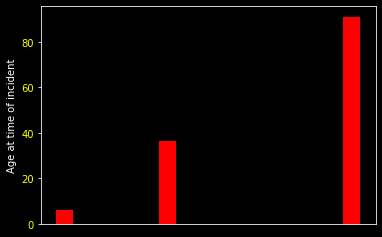

In [ ]:
plt.style.use('dark_background')

age_av = shootings_df['age'].mean()
young_age = shootings_df['age'].min()
max_age = shootings_df['age'].max()

plt.bar(age_av, height=age_av, width= 5, color='red')
plt.bar(young_age, height=young_age, width = 5, color='red')
plt.bar(max_age, height=max_age, width= 5, color='red')

plt.ylabel("Age at time of incident", color='white')

plt.yticks(color='yellow')

plt.tick_params(
    axis = 'x', 
    which='both',
    bottom=False,
    top=False,
    labelbottom=False
)


plt.show()

In [ ]:
armed_grouped_data = shootings_df.groupby('armed')['armed'].count()

armed_grouped_data

armed
BB gun                                 5
BB gun and vehicle                     1
Taser                                 24
air conditioner                        1
air pistol                             1
ax                                    21
barstool                               1
baseball bat                          16
baseball bat and bottle                1
baseball bat and fireplace poker       1
baseball bat and knife                 1
baton                                  4
bayonet                                1
bean-bag gun                           1
beer bottle                            1
blunt object                           5
bow and arrow                          1
box cutter                            11
brick                                  2
car, knife and mace                    1
carjack                                1
chain                                  3
chain saw                              1
chainsaw                               1
chair     

In [ ]:
top_20 = armed_grouped_data.sort_values(ascending=False)

print(top_20.shape)
top_20.head(20)

(89,)


armed
gun                2755
knife               708
unknown             418
unarmed             348
toy weapon          171
vehicle             120
machete              39
Taser                24
sword                22
ax                   21
baseball bat         16
gun and knife        15
hammer               14
screwdriver          12
metal pipe           12
sharp object         11
box cutter           11
hatchet              11
gun and vehicle      10
gun and car           9
Name: armed, dtype: int64

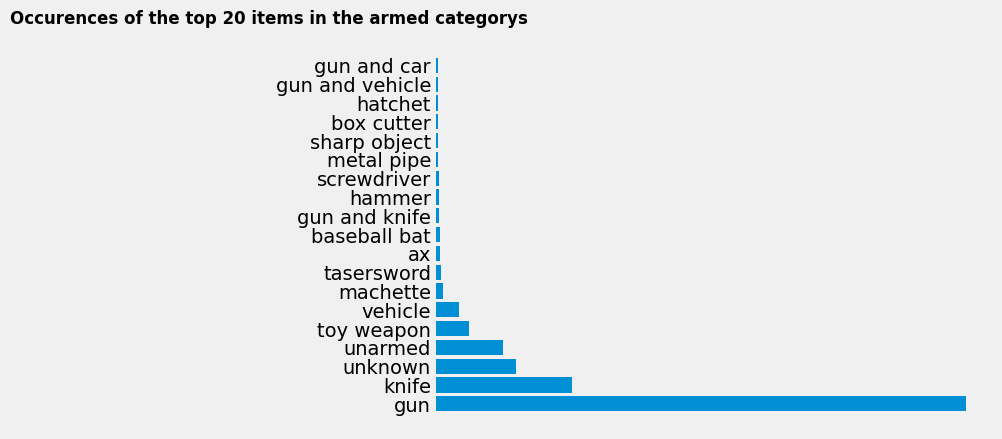

In [ ]:



top_20 = ['gun', 'knife', 'unknown', 'unarmed',
     'toy weapon', 'vehicle', 'machette', 'taser'
      'sword', 'ax', 'baseball bat', 'gun and knife',
      'hammer', 'screwdriver', 'metal pipe', 'sharp object',
      'box cutter', 'hatchet', 'gun and vehicle', 'gun and car']

top_20_freqs = [2755,708,418,348,
              171,120,39,24,
              22,21,16,15,
              14,12,12,11,
              11,11,10,
            ]




plt.style.use('fivethirtyeight')

fig, ax = plt.subplots()

# Here we set the color for both the figure, and the axes
fig.set_facecolor('#F0F0F0')
ax.set_facecolor('#F0F0F0')

# Here we set the title of the graph. 
ax.set_title('Occurences of the top 20 items in the armed categorys', fontweight='bold', fontsize= 12, pad=12, x= -.3, y=1)





# Here we remove the spines. 
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Here we remove the grid lines.
ax.grid(False)

# Here we remove the x ticks and labels. 
hidden_x_ticks = plt.xticks([])




# Here we create the horizontal bar chart.
ax.barh(top_20,top_20_freqs, align='center')

plt.show()